# Milestone 5

- Joshua Burden
- Bellevue University
- DSC530 
- Cathrine Williams
- 08/11/2022



- Your dataset
- A PowerPoint presentation outlining your statistical question/hypothesis
- A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
- Describe what the 5 variables mean in the dataset (Chapter 1).
- Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
- Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).
- Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).
- Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).
- Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).
- Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).
- Conduct a test on your hypothesis using one of the methods covered in Chapter 9.
- For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).
- Your code or screenshots of your code
- A 250-500-word paper summarizing the following: Statistical/Hypothetical Question
- Outcome of your EDA
- What do you feel was missed during the analysis?
- Were there any variables you felt could have helped in the analysis?
- Were there any assumptions made you felt were incorrect?
- What challenges did you face, what did you not fully understand?
- Submit a link to your repository to the assignment link during the final week of class.m

In [48]:
from __future__ import print_function, division

from os.path import basename, exists

%matplotlib inline




def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [49]:
#importing necessary librarires
import numpy as np #import numpy as np
import pandas as pd #import pandas as pd
from collections import Counter #import collections module
import matplotlib.pyplot as plt #import matplotlib
import statsmodels.formula.api as smf #import statsmodels
%matplotlib inline
import sys
import seaborn as sns #import seaborn module
from scipy import stats #import scipy module
import thinkstats2 #import thinkstats2 module
import thinkplot #import thinkplot module
import scipy.stats
from scipy import stats #import sipy and stats module
from sklearn.linear_model import LinearRegression #import sklearn module for models
from sklearn.metrics import r2_score

In [10]:
data_df = pd.read_csv('Automobile_data.csv')
data_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
data_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
data_df['bore'].loc[data_df['bore'] == '?'].count()

4

In [15]:
df = data_df['normalized-losses'].loc[data_df['normalized-losses'] != '?'] #get non ? values in to a df
dfMean = df.astype(str).astype(int).mean() #compute mean value of the df from above step
data_df['normalized-losses'] = data_df['normalized-losses'].replace('?',dfMean).astype(int)#replace ? values with mean value calcuated above step
data_df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

In [17]:
data_df_price = data_df['price'].loc[data_df['price'] != '?']#get non ? values in to a df
data_df_pricemean = data_df_price.astype(str).astype(int).mean()  #compute mean value of the df from above step
data_df['price'] = data_df['price'].replace('?',data_df_pricemean).astype(int)#replace ? values with mean value calcuated above step
data_df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [18]:
data_df_horsepower = data_df['horsepower'].loc[data_df['horsepower'] != '?']#get non ? values in to a df
data_df_horsepoweremean = data_df_horsepower.astype(str).astype(int).mean()  #compute mean value of the df from above step
data_df['horsepower'] = data_df['horsepower'].replace('?',data_df_horsepoweremean).astype(int)#replace ? values with mean value calcuated above step
data_df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [19]:
data_df['num-of-doors'].loc[data_df['num-of-doors'] == '?'] #finding num-of-doors values that are not valid
data_df = data_df[data_df['num-of-doors'] != '?']
data_df['num-of-doors'].loc[data_df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [20]:
data_df['bore'].loc[data_df['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [27]:
data_df_numdoors = data_df[data_df['num-of-doors'] != '?'] #finding num-of-doors with ? and replacing it will non ? value
data_df['num-of-doors'].loc[data_df_numdoors['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [28]:
data_df_Bore = data_df['bore'].loc[data_df['bore'] != '?']#get non ? values in to a df
data_df_Boremean = data_df_Bore.astype(str).astype(float).mean()  #compute mean value of the df from above step
data_df['bore'] = data_df['bore'].replace('?',data_df_Boremean).astype(float)#replace ? values with mean value calcuated above step
data_df['bore'].head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [29]:
data_df['bore'].loc[data_df['bore'] == '?']

Series([], Name: bore, dtype: float64)

In [30]:
data_df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [31]:
data_df['bore'] = pd.to_numeric(data_df['bore'],errors='coerce')

In [32]:
data_df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [33]:
#checking for duplications in dataframe
data_df.duplicated().value_counts()

False    203
dtype: int64

## Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [35]:
data_df.median()


/var/folders/ct/l8y_jb751b1ghqz7j4qhxv580000gn/T/ipykernel_24419/700068382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_df.median()


symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
compression-ratio        9.00
horsepower              95.00
city-mpg                24.00
highway-mpg             30.00
price                10595.00
dtype: float64

In [36]:
data_df.mean()

/var/folders/ct/l8y_jb751b1ghqz7j4qhxv580000gn/T/ipykernel_24419/3650157872.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_df.mean()


symboling                0.837438
normalized-losses      121.871921
wheel-base              98.781281
length                 174.113300
width                   65.915271
height                  53.731527
curb-weight           2557.916256
engine-size            127.073892
bore                     3.330955
compression-ratio       10.093202
horsepower             104.463054
city-mpg                25.172414
highway-mpg             30.699507
price                13241.911330
dtype: float64

In [37]:
data_df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [38]:
data_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,10.093202,104.463054,25.172414,30.699507,13241.911330
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.271327,3.888216,39.612384,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,8.600000,70.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.585000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,23.000000,288.000000,49.000000,54.000000,45400.000000


Text(0.5, 0, 'Make')

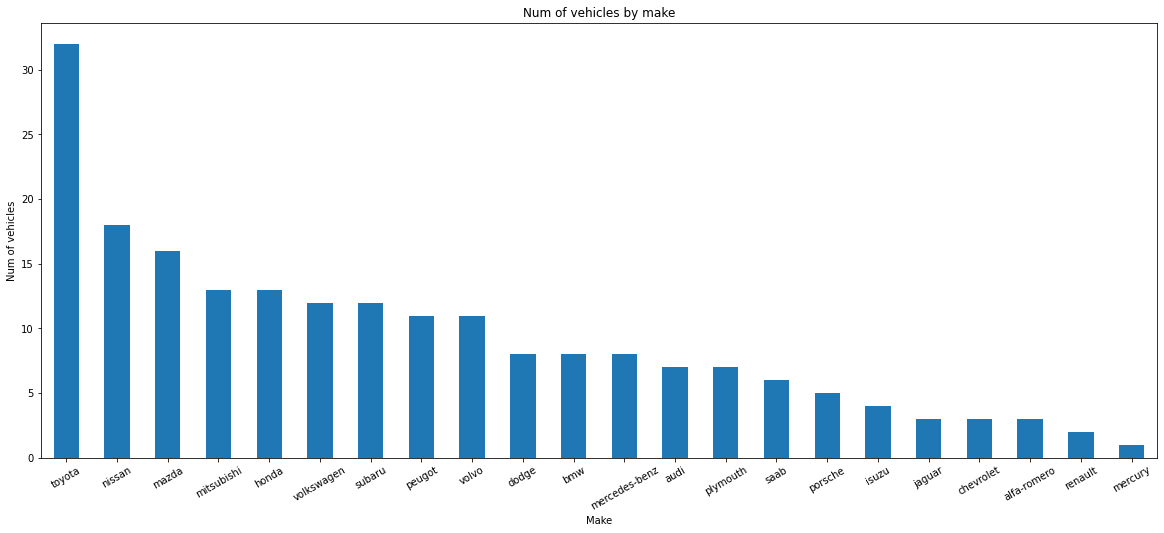

In [39]:
data_df.make.value_counts().nlargest(40).plot(kind='bar', figsize=(20,8)) #get the count groupby make form data frame amdf
plt.title("Num of vehicles by make") #title of the plot
plt.ylabel('Num of vehicles') #Y axis label
plt.xticks(rotation=30) #rotate x axis lable to 30 degrees
plt.xlabel('Make') #X axis label

Text(0.5, 0, 'Normalized-losses')

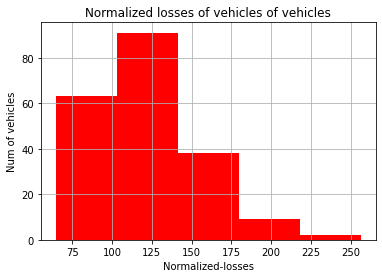

In [56]:
data_df['normalized-losses'].hist(bins=5,color='red')#plot normalized-losses with56 bins and green color
plt.title("Normalized losses of vehicles of vehicles") #title of the chart
plt.ylabel('Num of vehicles') #y label
plt.xlabel('Normalized-losses') #x label

Text(0.5, 0, 'Risk rating')

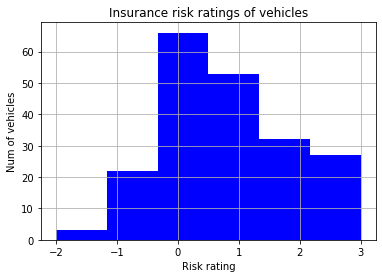

In [40]:
data_df.symboling.hist(bins=6, color='blue') #plot symboling with 6 bins and grey color
plt.title("Insurance risk ratings of vehicles") #title of the char
plt.ylabel('Num of vehicles') #y axis label
plt.xlabel('Risk rating') #x Axis label

### How many cars usee gas vs diesel?

Text(0.5, 0, 'Fuel Type')

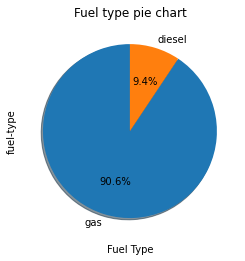

In [42]:
data_df['fuel-type'].value_counts().plot.pie( autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.title("Fuel type pie chart") 
plt.xlabel('Fuel Type') 

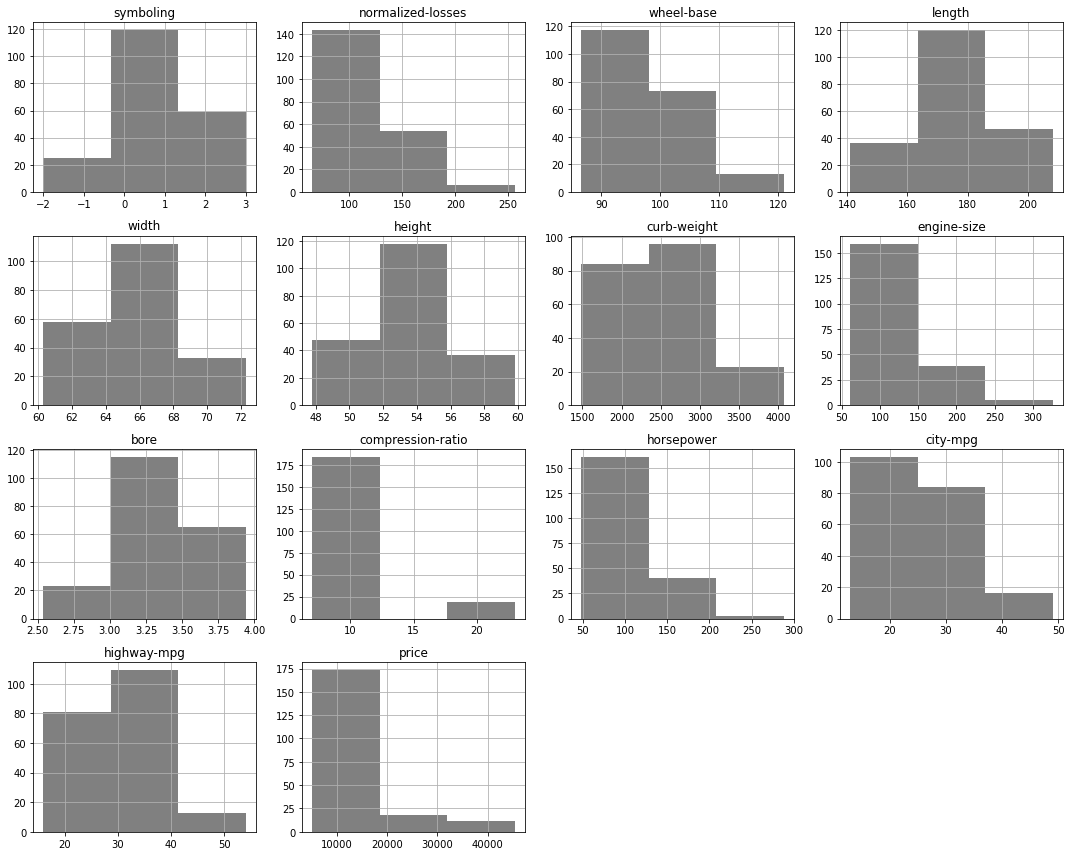

In [41]:
data_df.hist(bins=3,figsize=(15,12), color='grey')
plt.tight_layout()

## Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter.

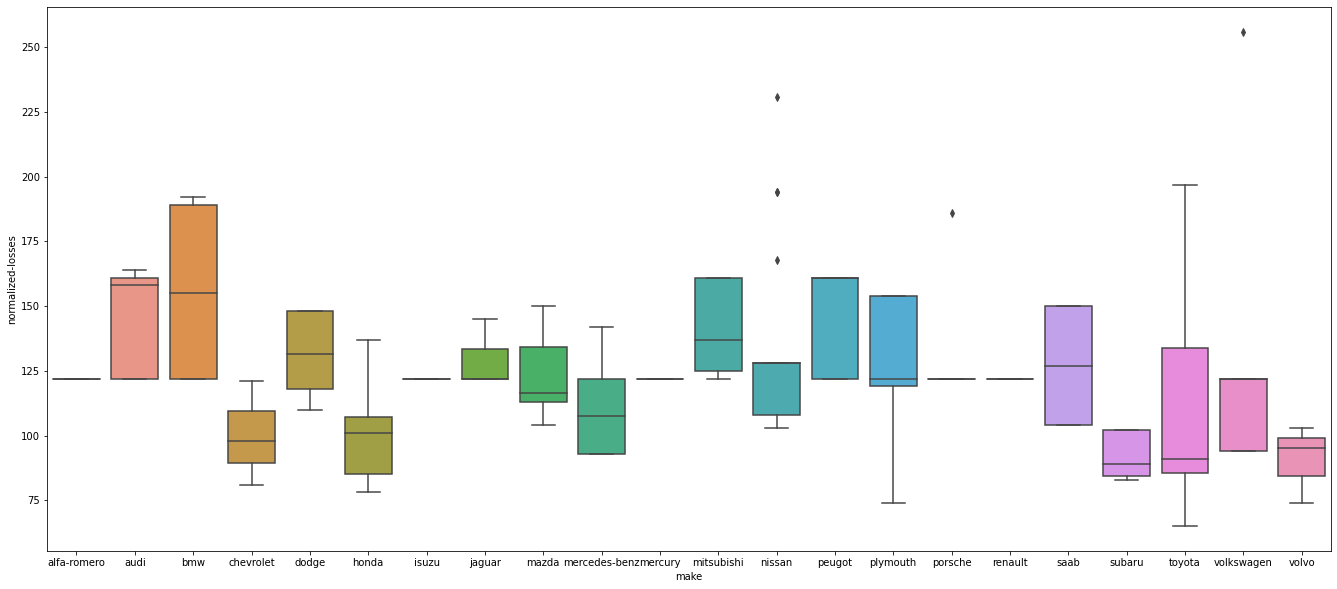

In [46]:
plt.rcParams['figure.figsize']=(23,10) #figure size 23,10
ax = sns.boxplot(x="make", y="normalized-losses", data=data_df)#boxplot for make and normalised-losses

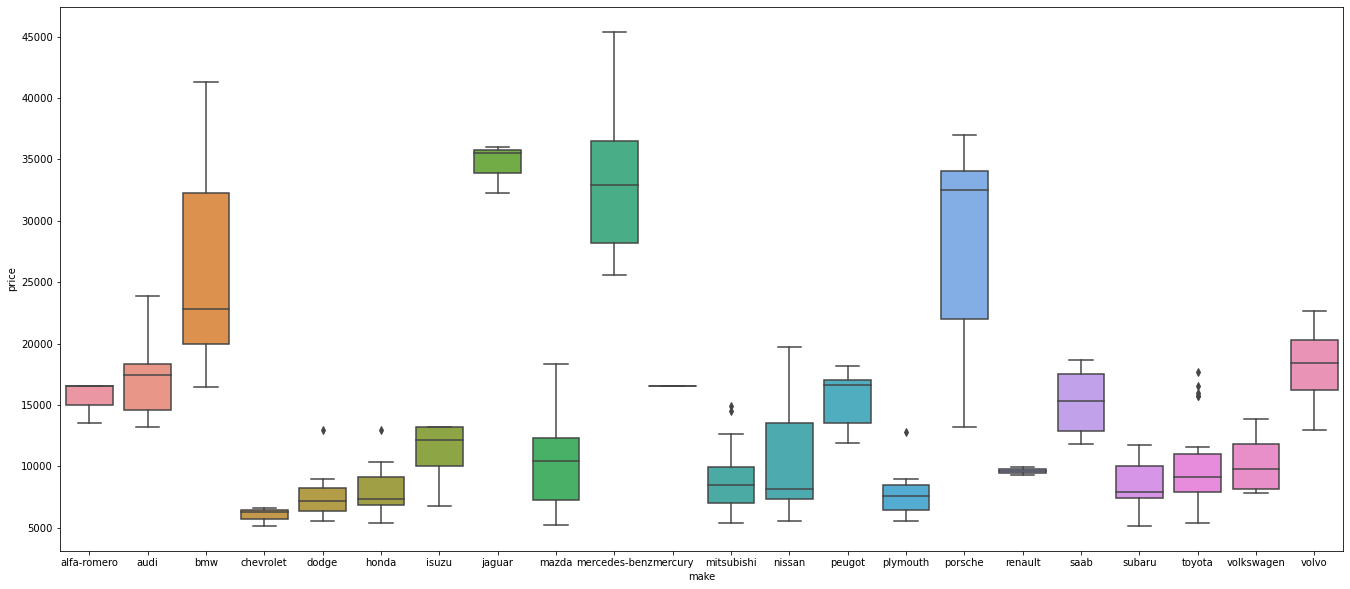

In [44]:
plt.rcParams['figure.figsize']=(23,10) #figure size 23,10
ax = sns.boxplot(x="make", y="price", data=data_df) #boxplot for make and price

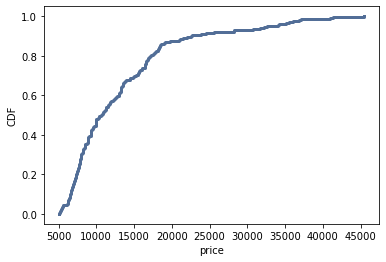

<Figure size 576x432 with 0 Axes>

In [50]:
cdf = thinkstats2.Cdf(data_df["price"]) #calculate CDF of price using thinkstat2 module
thinkplot.Cdf(cdf) #plot CDF value
thinkplot.Show(xlabel="price", ylabel="CDF") #x and y label values

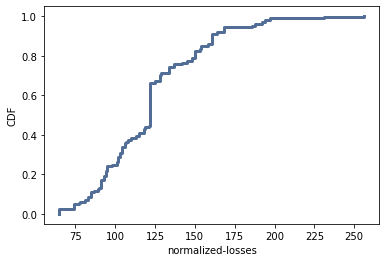

<Figure size 576x432 with 0 Axes>

In [51]:
cdf = thinkstats2.Cdf(data_df["normalized-losses"])#calculate CDF of normalized-losses using thinkstat2 module
thinkplot.Cdf(cdf) #plot CDF value
thinkplot.Show(xlabel="normalized-losses", ylabel="CDF")#x and y label values

## Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

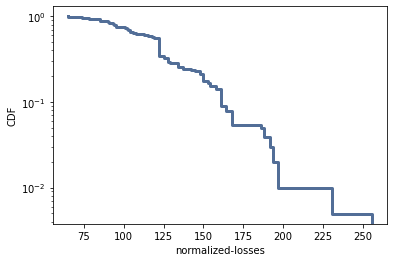

The line is not flat, meaning that exponential distro is not a good model fit for this data. 


<Figure size 576x432 with 0 Axes>

In [54]:
cdf = thinkstats2.Cdf(data_df["normalized-losses"])
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='normalized-losses',ylabel='CDF',yscale='log')
print("The line is not flat, meaning that exponential distro is not a good model fit for this data. ")

## Create two scatter plots comparing two variables and provide your analysis on correlation and causation.**
- Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [57]:
data_df_cols=['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'horsepower',
 'city-mpg',
 'highway-mpg'] #get column names for integer values
print('Given Price')
for i in data_df_cols: #loop through columns
    pearsoncoef,pvalue=stats.pearsonr(data_df[i],data_df["price"]) #caluclate pearson coefficients for each colum against price
    print("For {} pearson coefficient is {} ".format(i,pearsoncoef,pvalue))#print corresponding coefficients and P value
    
print("Price seems to increase when horsepower/miles traveled")    

Given Price
For symboling pearson coefficient is -0.08301993976238638 
For normalized-losses pearson coefficient is 0.13677016817097587 
For wheel-base pearson coefficient is 0.5823786680800346 
For length pearson coefficient is 0.6834936293988816 
For width pearson coefficient is 0.7289172034774374 
For height pearson coefficient is 0.13261369723972555 
For curb-weight pearson coefficient is 0.8204391954941144 
For engine-size pearson coefficient is 0.8615447387770904 
For compression-ratio pearson coefficient is 0.07599222145477079 
For horsepower pearson coefficient is 0.7590057204838158 
For city-mpg pearson coefficient is -0.6707658566722715 
For highway-mpg pearson coefficient is -0.6937011821271691 
Price seems to increase when horsepower/miles traveled


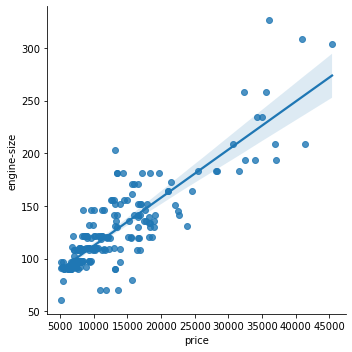

In [59]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)#ignoring warnings
sns.lmplot('price',"engine-size", data_df); #scattor plotting price and engine size

In [60]:
data_df.cov()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.562552,18.513730,-4.024345,-5.519609,-0.624238,-1.652770,-1.492711e+02,-5.537434,-0.043767,-0.837645,3.382578,-0.249061,0.346949,-8.197274e+02
normalized-losses,18.513730,1010.260742,-10.235083,9.746266,6.050975,-28.578615,1.676232e+03,151.628323,-0.214199,-14.233350,257.539799,-45.636224,-39.177291,3.433823e+04
wheel-base,-4.024345,-10.235083,36.493608,65.196834,10.320238,8.680247,2.449239e+03,143.453370,0.797412,5.968595,84.540394,-18.747252,-22.805653,2.778969e+04
length,-5.519609,9.746266,65.196834,152.253139,22.295192,14.656856,5.665871e+03,352.241092,2.020371,7.398987,273.530444,-54.984978,-60.728657,6.661736e+04
width,-0.624238,6.050975,10.320238,22.295192,4.623677,1.440209,9.745419e+02,66.059757,0.324774,1.495674,55.073587,-9.153141,-10.143903,1.238060e+04
height,-1.652770,-28.578615,8.680247,14.656856,1.440209,5.965932,3.751111e+02,6.495184,0.109085,2.411032,-10.421107,-0.898532,-1.934539,2.558570e+03
curb-weight,-149.271107,1676.231795,2449.238524,5665.871416,974.541879,375.111069,2.730659e+05,18570.332951,91.842999,318.665666,15578.672633,-2601.653807,-2882.693606,3.386491e+06
engine-size,-5.537434,151.628323,143.453370,352.241092,66.059757,6.495184,1.857033e+04,1746.999463,6.606720,4.788970,1346.039872,-179.745476,-196.027191,2.844422e+05
bore,-0.043767,-0.214199,0.797412,2.020371,0.324774,0.109085,9.184300e+01,6.606720,0.073618,-0.001826,6.231640,-1.051113,-1.110259,1.139447e+03
compression-ratio,-0.837645,-14.233350,5.968595,7.398987,1.495674,2.411032,3.186657e+02,4.788970,-0.001826,15.118222,-30.127035,7.833257,6.614630,2.333938e+03


## For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [66]:
linear = LinearRegression() #linear regression function in to variable
xs=data_df[['city-mpg']] #get x value as city mpg values
ys=data_df['price'] #get y value for price values
linear.fit(xs,ys) #pass x and y values to model to train (ys as function of xs)
y_pred=linear.predict(xs) #for each value of x predict y
print("LM Intercept is",linear.intercept_) 
print("LM Coefficient is",linear.coef_)

LM Intercept is 33667.046589172474
LM Coefficient is [-811.4094829]


<Figure size 576x576 with 0 Axes>

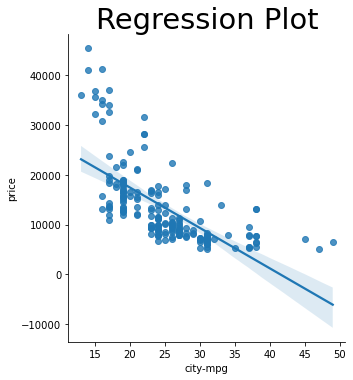

In [68]:
plt.figure(figsize=(8,8)) #plot 8 by 8 figure
sns.lmplot(x='city-mpg',y='price',data=data_df) #visualize linear relation ship for city miles to price
plt.title("Regression Plot",fontsize=29)
plt.show()

In [69]:
x=data_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X=x.iloc[:,:]
Y=data_df['price']
X

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22
...,...,...,...,...
200,114,2952,141,28
201,160,3049,141,25
202,134,3012,173,23
203,106,3217,145,27


In [70]:
df2=pd.DataFrame(X,columns=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'])
df2['price']=pd.Series(Y)

In [71]:
model=smf.ols('Q("price") ~ Q("horsepower") + Q("curb-weight") + Q("engine-size") + Q("highway-mpg")',data=df2)

In [72]:
results_formula = model.fit()
results_formula.params
results_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q("price")   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           4.13e-63
Time:                        19:56:01   Log-Likelihood:                -1957.6
No. Observations:                 203   AIC:                             3925.
Df Residuals:                     198   BIC:                             3942.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9218.0489   4436.913     -2.078      0.039    -1.8e+04    -468.380
Q("horsepower")     18.1823     13.472      1.350      0.179      -8.384      44.748
Q("curb-weight")     3.8011      1.194      3.183      0.002       1.446       6.156
Q("engine-size")   101.0721     14.478      6.981      0.000      72.522     129.623
Q("highway-mpg")   -65.3384     74.212     -0.880      0.380    -211.686      81.010
==============================================================================
Omnibus:                       25.282   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.960
Skew:                           0.512   Prob(JB):                     7.84e-15
Kurtosis:                       5.575   Cond. No.                     4.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""